# Predicting wine quality with Python and Scikit-learn

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,  plot_confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data

In [2]:
wine = pd.read_csv(r'C:\Users\ibubalo\Desktop\winequalityN.csv')

In [3]:
wine.shape

(6497, 13)

In [4]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


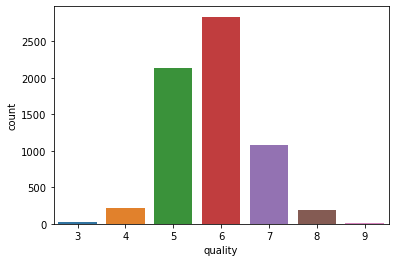

In [7]:
sns.countplot (x = 'quality', data = wine)

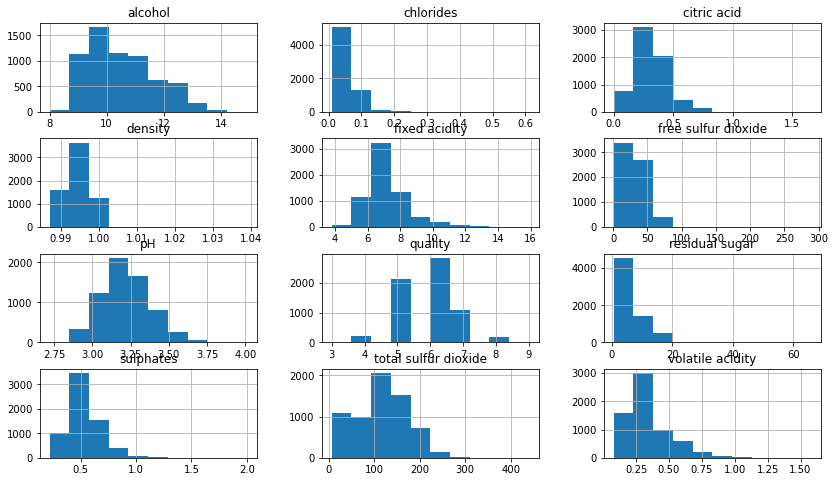

In [8]:
# Histograms
wine.hist(bins=10,figsize=(14, 8))
plt.show()


### Preprocessing

In [9]:
wine.dropna(axis = 1, inplace = True)

In [10]:
#preprocessing
bins = (2,6.5,8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality'].unique()

[bad, good, NaN]
Categories (2, object): [bad < good]

In [11]:
wine.groupby('quality').mean()

,free sulfur dioxide,total sulfur dioxide,density,alcohol
quality,,,,
bad,30.395690,117.176533,0.995105,10.261462
good,31.045991,109.867138,0.993033,11.430425


In [12]:
wine.isnull().sum()

type                    0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
alcohol                 0
quality                 5
dtype: int64

In [13]:
is_NaN = wine.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = wine[row_has_NaN]
print(rows_with_NaN)

       type  free sulfur dioxide  total sulfur dioxide  density  alcohol  \
774   white                 28.0                 124.0  0.99700     10.4   
820   white                 24.0                  85.0  0.98965     12.4   
827   white                 27.0                 139.0  0.99055     12.5   
876   white                 57.0                 119.0  0.98980     12.7   
1605  white                 31.0                 113.0  0.99030     12.9   

     quality  
774      NaN  
820      NaN  
827      NaN  
876      NaN  
1605     NaN  


In [14]:
wine.dropna(inplace = True)

In [15]:
wine['quality'].value_counts()

bad     5220
good    1272
Name: quality, dtype: int64

In [16]:
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [17]:
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'].astype(str))
wine['quality'].unique()

array([0, 1])

In [18]:
wine = wine.drop(columns = 'type')

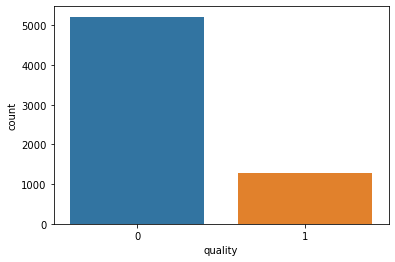

In [19]:
sns.countplot(wine['quality'])

In [20]:
#Separate the dataset as response variable and feature variable
X = wine.drop('quality', axis = 1) #use to predict the quality of wine
y = wine['quality'] #the observed quality

In [21]:
#train and test splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
#Apply standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### RF Classifier

In [23]:
rfc = RandomForestClassifier(n_estimators = 200) #how many decision trees
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1026
           1       0.76      0.56      0.64       273

    accuracy                           0.87      1299
   macro avg       0.83      0.76      0.78      1299
weighted avg       0.86      0.87      0.86      1299

[[979  47]
 [121 152]]


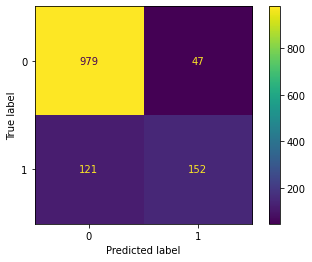

In [24]:
#model performance
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
plot_confusion_matrix(rfc, X_test, y_test)

### K-nearest neighbours classifier

In [25]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1026
           1       0.62      0.49      0.55       273

    accuracy                           0.83      1299
   macro avg       0.75      0.71      0.72      1299
weighted avg       0.82      0.83      0.82      1299

[[944  82]
 [138 135]]


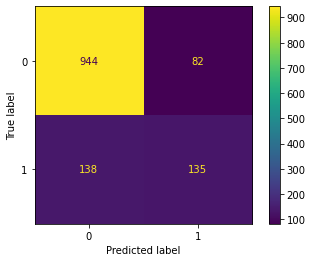

In [26]:
#model performance
print(classification_report(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))
plot_confusion_matrix(knn, X_test, y_test)

In [27]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1026
           1       0.62      0.45      0.52       273

    accuracy                           0.83      1299
   macro avg       0.74      0.69      0.71      1299
weighted avg       0.81      0.83      0.82      1299

[[952  74]
 [151 122]]


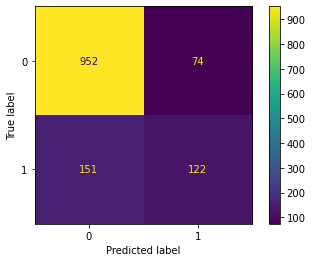

In [28]:
#model performance
print(classification_report(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))
plot_confusion_matrix(knn, X_test, y_test)

### SVM Classifier

In [29]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1026
           1       0.63      0.18      0.28       273

    accuracy                           0.81      1299
   macro avg       0.73      0.58      0.59      1299
weighted avg       0.78      0.81      0.76      1299

[[997  29]
 [223  50]]


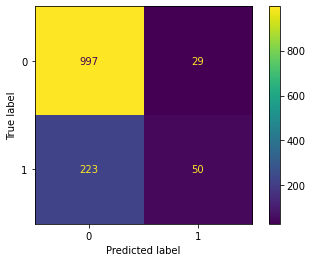

In [30]:
#model performance
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))
plot_confusion_matrix(clf, X_test, y_test)

### Neural Network

In [31]:
mlpc = MLPClassifier(hidden_layer_sizes = (11,11,11), max_iter = 500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1026
           1       0.60      0.28      0.38       273

    accuracy                           0.81      1299
   macro avg       0.72      0.62      0.64      1299
weighted avg       0.78      0.81      0.78      1299

[[975  51]
 [196  77]]


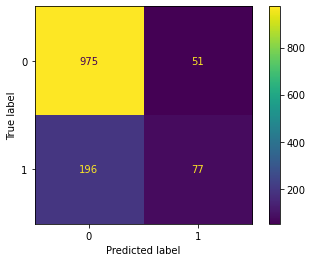

In [32]:
#model performance
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))
plot_confusion_matrix(mlpc, X_test, y_test)

In [33]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.8706697459584296

In [34]:
cm2 = accuracy_score(y_test, pred_clf)
cm2

0.8060046189376443

In [35]:
cm3 = accuracy_score(y_test, pred_mlpc)
cm3

0.8098537336412626

In [36]:
cm4 = accuracy_score(y_test, pred_knn)
cm4

0.8267898383371824

In [37]:
wine.head()

,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
0,45.0,170.0,1.0010,8.8,0
1,14.0,132.0,0.9940,9.5,0
2,30.0,97.0,0.9951,10.1,0
3,47.0,186.0,0.9956,9.9,0
4,47.0,186.0,0.9956,9.9,0


In [38]:
Xnew = [[7.3,0.58,0.00,2.0]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array([0])